In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
x = np.arange(100)
y = 10*x + 2 + np.random.random((100,))*100

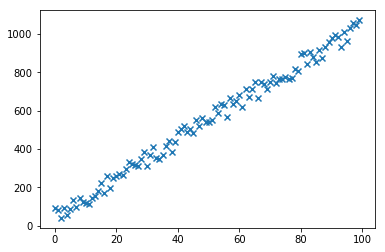

In [4]:
plt.scatter(x,y, marker='x')
plt.show()

** Analytical Solution for Linear Regression **

In [7]:
X = np.stack((x, np.ones((100,))), axis=1)

In [12]:
Y = y.reshape(-1,1)

In [13]:
from numpy import dot
from numpy.linalg import inv

In [14]:
W = dot(dot(inv(dot(X.T,X)),X.T),Y)
W

array([[ 10.03972054],
       [ 50.2176713 ]])

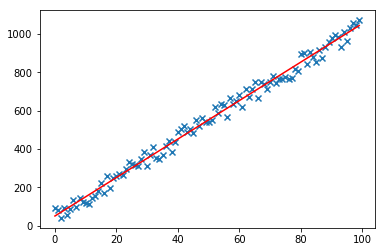

In [16]:
yp = dot(X, W)
plt.scatter(x,y,marker='x')
plt.plot(x,yp,c='r')
plt.show()

In [17]:
import tensorflow as tf

In [18]:
g = tf.Graph() 

In [65]:
def create_graph(g, ndim):
    with g.as_default():
        Xt = tf.placeholder(dtype=tf.float32, shape=[None, ndim])
        Yt = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    
        Wt =  tf.matmul(tf.matmul(
            tf.matrix_inverse(
                tf.matmul(tf.transpose(Xt),Xt)),tf.transpose(Xt)), Yt)    
    
    return Wt, Xt, Yt

In [66]:
sess = tf.InteractiveSession(graph=g)

In [67]:
Wt,Xt,Yt = create_graph(g, 2)
sess.run(Wt, feed_dict={Xt:X, Yt:Y})

array([[  9.81866264],
       [ 55.90805435]], dtype=float32)

In [32]:
w_

array([[ 10.03972054],
       [ 50.2176713 ]])

In [33]:
from tensorflow.contrib.learn import datasets

In [34]:
boston = datasets.load_boston()

In [42]:
Xb = np.hstack((boston.data,np.ones((506,1))))

In [44]:
Yb = boston.target.reshape(-1,1)

In [47]:
Wb = dot(dot(inv(dot(Xb.T,Xb)),Xb.T),Yb)
Wb

array([[ -1.07170557e-01],
       [  4.63952195e-02],
       [  2.08602395e-02],
       [  2.68856140e+00],
       [ -1.77957587e+01],
       [  3.80475246e+00],
       [  7.51061703e-04],
       [ -1.47575880e+00],
       [  3.05655038e-01],
       [ -1.23293463e-02],
       [ -9.53463555e-01],
       [  9.39251272e-03],
       [ -5.25466633e-01],
       [  3.64911033e+01]])

In [49]:
np.mean((dot(Xb,Wb)-Yb)**2)**0.5


4.6795063006355164

In [70]:
Yb.shape

(506, 1)

In [72]:
g = tf.Graph()
Wt,Xt,Yt = create_graph(g, 14)
sess = tf.InteractiveSession(graph=g)

In [88]:
sess.run(Wt, feed_dict={Xt:Xb[:500], Yt:Yb[:500]})

array([[ -1.05168238e-01],
       [  4.87573519e-02],
       [  1.84805319e-02],
       [  2.59980440e+00],
       [ -1.70375500e+01],
       [  3.79126978e+00],
       [  2.07994319e-03],
       [ -1.51530337e+00],
       [  2.90500939e-01],
       [ -1.25599289e-02],
       [ -8.86123359e-01],
       [  9.37229116e-03],
       [ -5.39569378e-01],
       [  3.54492607e+01]], dtype=float32)

In [85]:
Yb[:100].shape

(100, 1)

In [81]:
sess.run(Wt, feed_dict={Xt:Xb[100:], Yt:Yb[100:]})

array([[ -1.08863838e-01],
       [  5.88304475e-02],
       [  5.36272265e-02],
       [  2.52341509e+00],
       [ -2.12082806e+01],
       [  3.27506471e+00],
       [ -4.01151367e-03],
       [ -1.78451896e+00],
       [  3.18649173e-01],
       [ -1.25104059e-02],
       [ -1.01333010e+00],
       [  9.36425105e-03],
       [ -5.82566381e-01],
       [  4.45702972e+01]], dtype=float32)